In [1]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import hopsworks
import pandas as pd

/Users/karlsimu/miniforge3/envs/base-id2223/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/185498
Connected. Call `.close()` to terminate connection gracefully.


In [4]:
wine_df = pd.read_csv("/Users/karlsimu/Programming/Python/School/ID2223/LAB1/P2/winequalityN.csv")
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### Dropping data

Taking the 'easy route' and dropping every row with any NA value & duplicates

In [6]:
wine_df.dropna(axis='index', how='any', inplace=True)
wine_df.drop_duplicates(inplace=True)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5295 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5295 non-null   object 
 1   fixed acidity         5295 non-null   float64
 2   volatile acidity      5295 non-null   float64
 3   citric acid           5295 non-null   float64
 4   residual sugar        5295 non-null   float64
 5   chlorides             5295 non-null   float64
 6   free sulfur dioxide   5295 non-null   float64
 7   total sulfur dioxide  5295 non-null   float64
 8   density               5295 non-null   float64
 9   pH                    5295 non-null   float64
 10  sulphates             5295 non-null   float64
 11  alcohol               5295 non-null   float64
 12  quality               5295 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 579.1+ KB


In [7]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000
mean,7.218008,0.344021,0.318782,5.051029,0.056690,30.046837,114.118225,0.994536,3.224385,0.533199,10.550154,5.796034
std,1.320690,0.168237,0.147112,4.500641,0.036901,17.827151,56.787187,0.002969,0.160155,0.149851,1.186533,0.880005
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994670,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,154.000000,0.996780,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
wine_df['quality'].value_counts()

quality
6    2311
5    1745
7     852
4     204
8     148
3      30
9       5
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)  our Iris Data

Let's look at our iris flower - the distribution and range of values for the 4 different features
 * sepal_length
 * sepal_width
 * petal_length
 * petal_width
 
 and the target variable is `variety`.

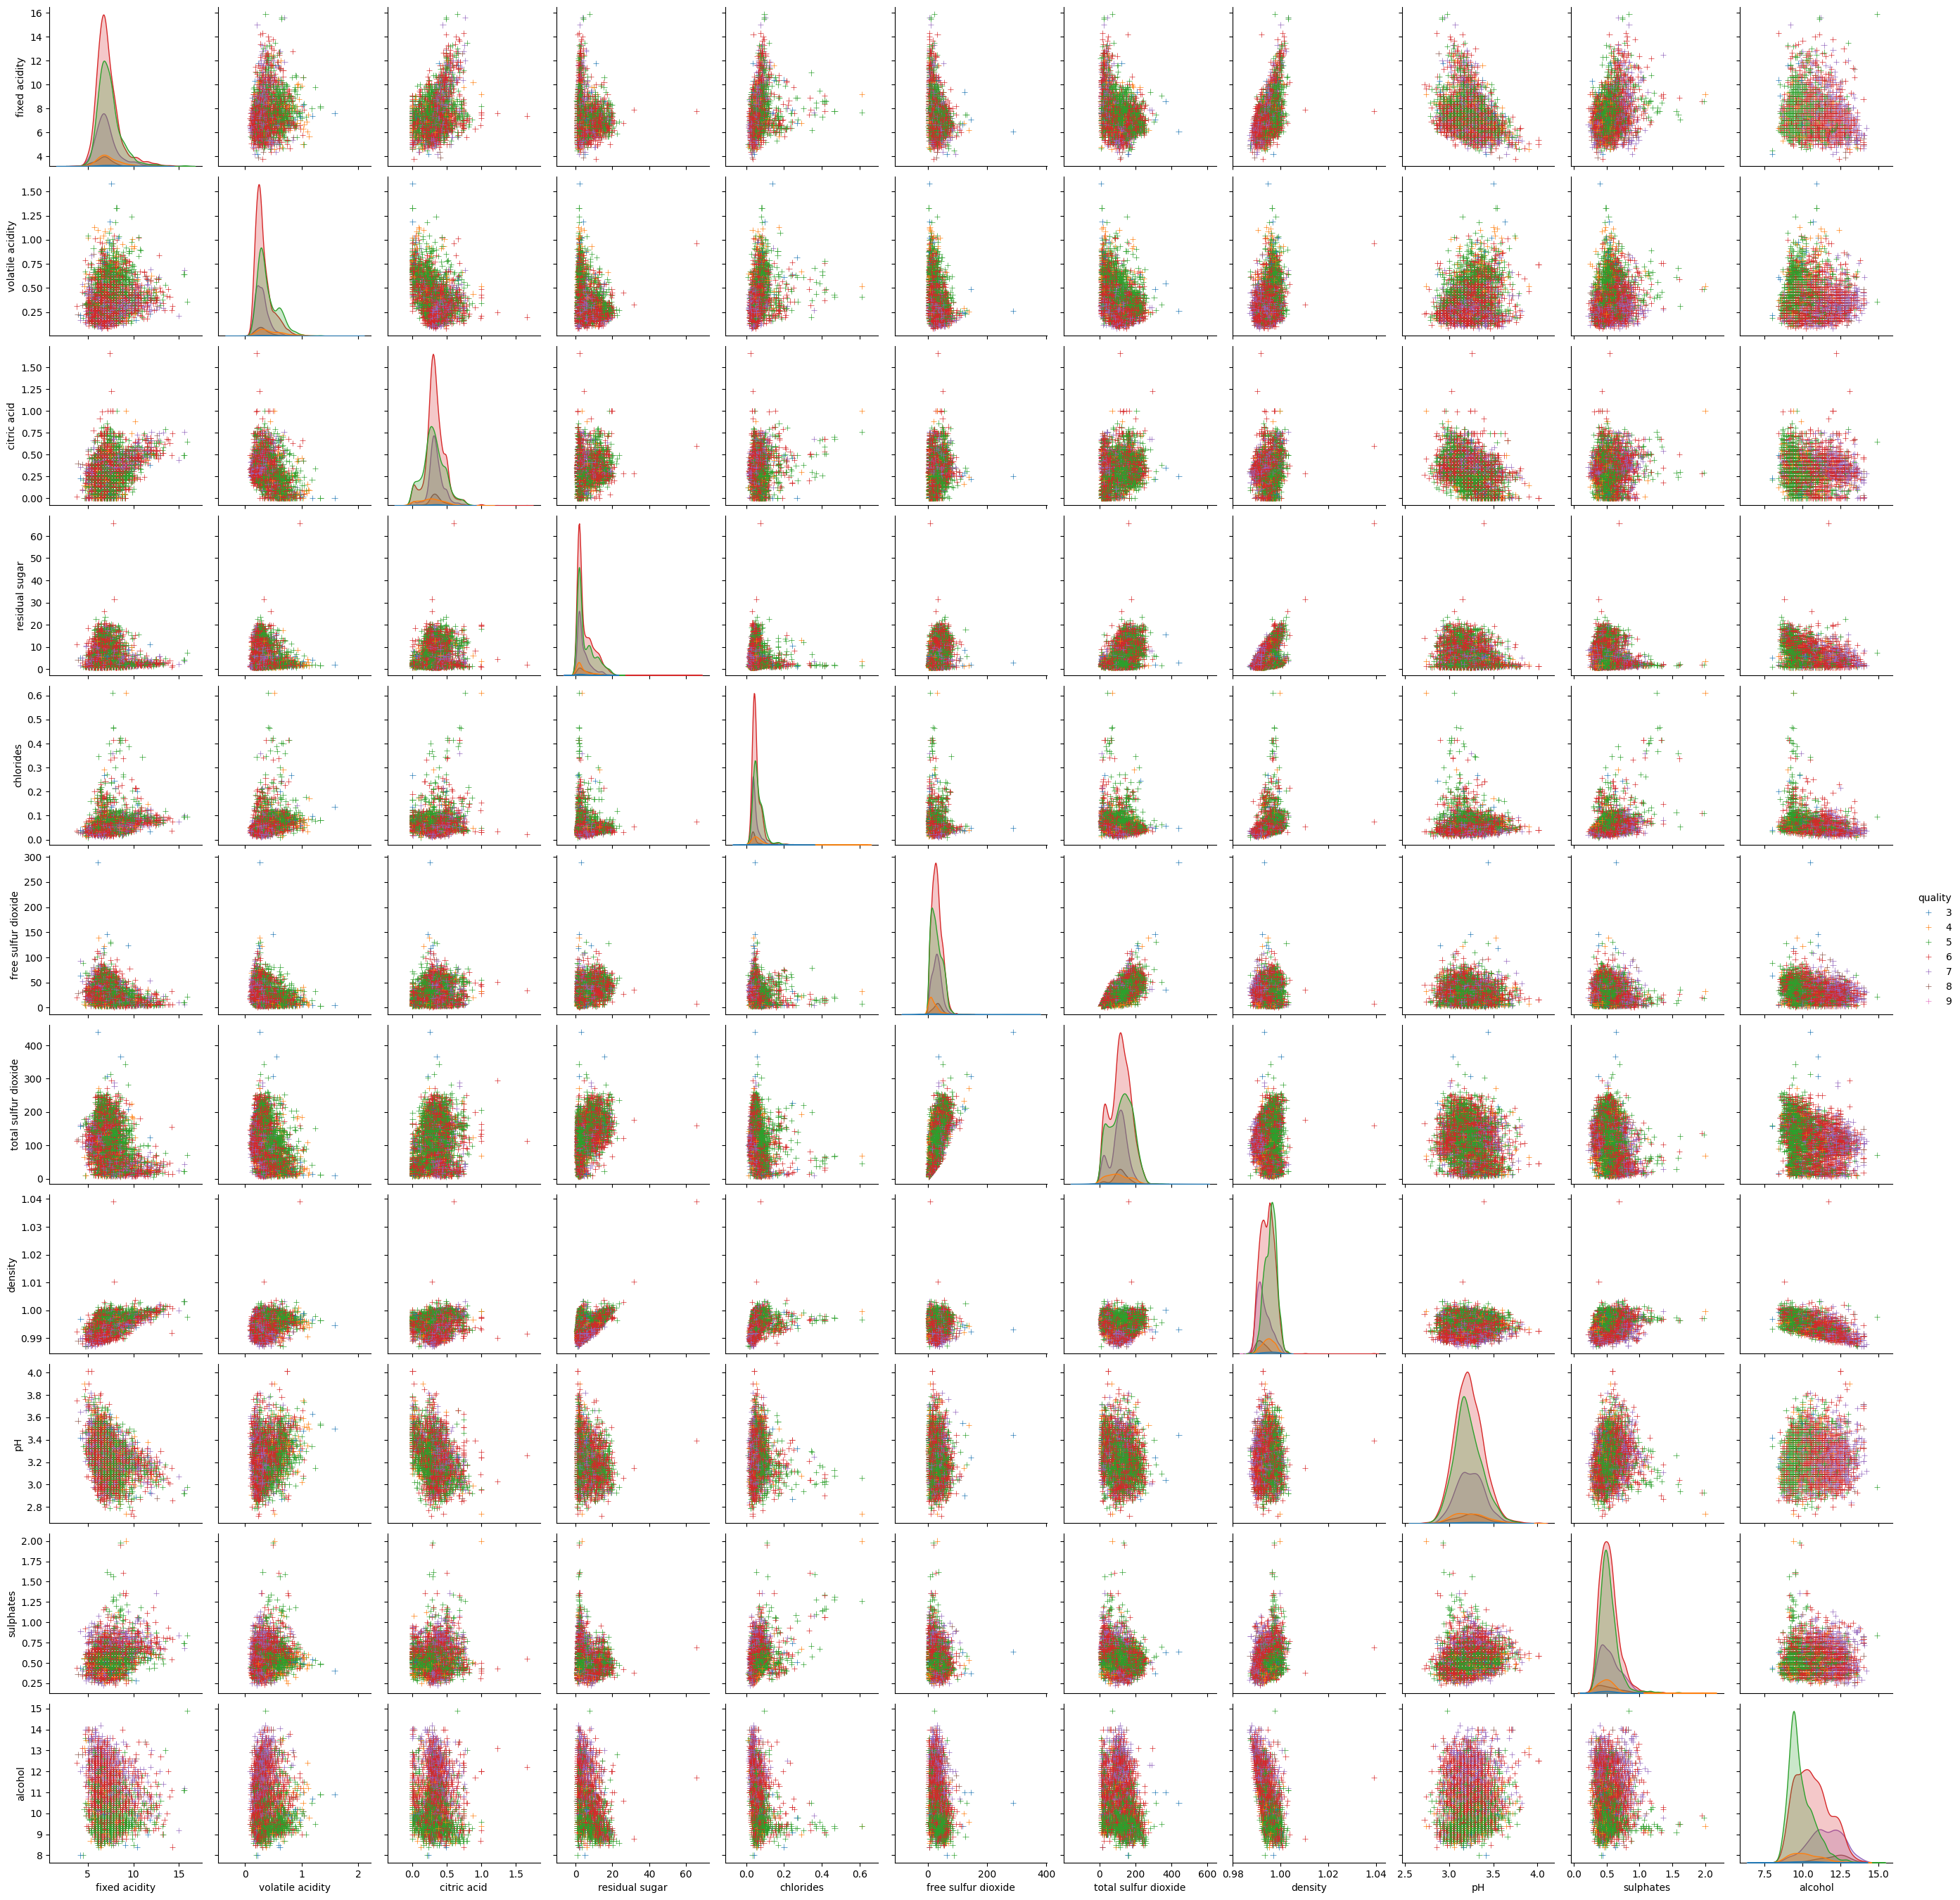

In [9]:
g = sns.pairplot(wine_df, hue='quality', markers='+', palette='tab10')
plt.show()

### Heatmap

simillarly we could plot a heatmap of correlations, noticable are the corrs, between 'free sulfur dioxide' and 'total sulfur dioxide' as well as betwwen 'alcholhol' and 'density'. Looking at the column (or row) for 'quality' which we are interesed in, we also see rather low (linear) correlation with a number of features. These features may be considered dropping.

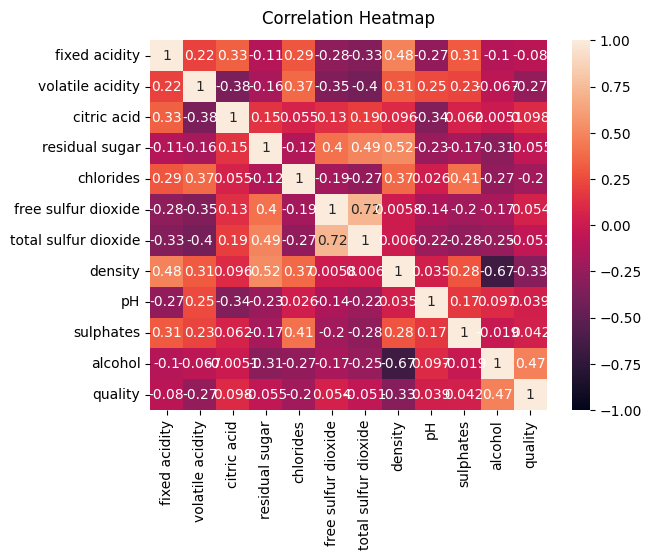

In [10]:
heatmap = sns.heatmap(wine_df.drop('type', axis='columns').corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Visualize range of values 

We want to design a simulator generate the 3 types of iris flower (setosa, versicolor, virginica).
To do this, we can visualize the range of values for the length and width of the sepal and petal for each of the 3 flowers.

2023-11-16 14:26:08,258 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-16 14:26:08,264 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


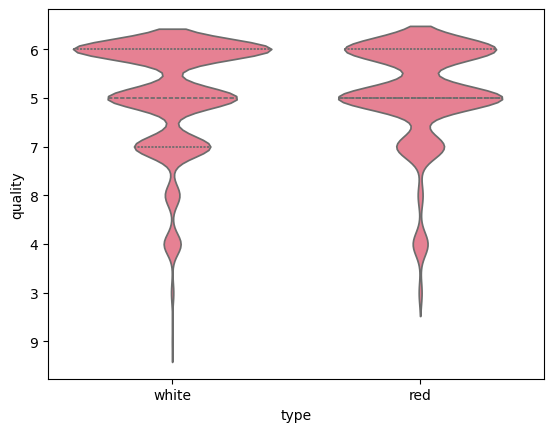

2023-11-16 14:26:08,405 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-16 14:26:08,440 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


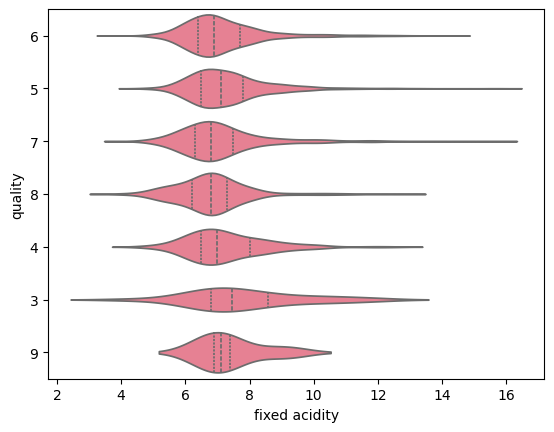

2023-11-16 14:26:08,707 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-16 14:26:08,727 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


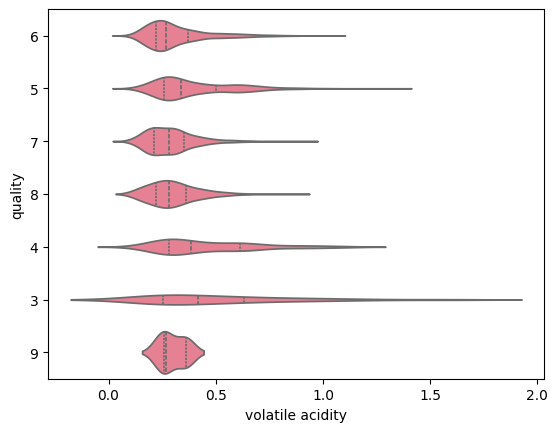

2023-11-16 14:26:08,955 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-16 14:26:08,964 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


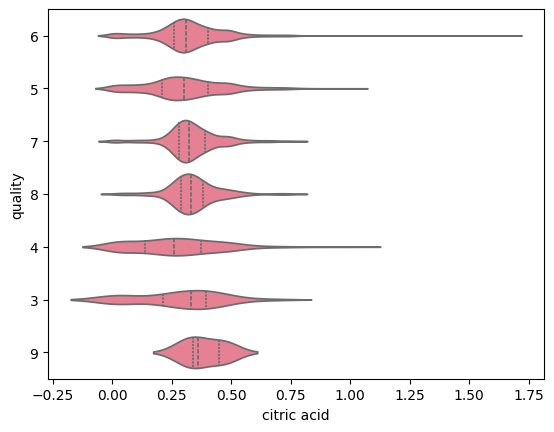

2023-11-16 14:26:09,227 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-16 14:26:09,237 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


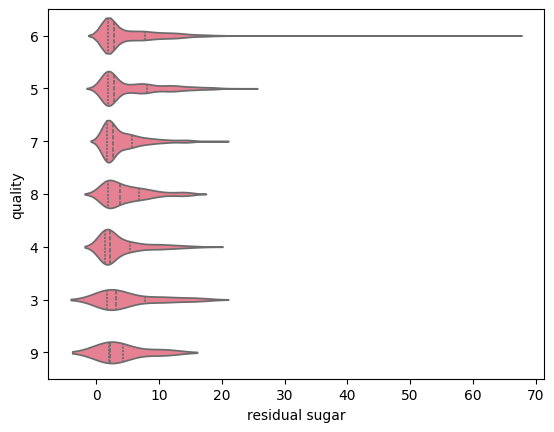

2023-11-16 14:26:09,557 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-16 14:26:09,567 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


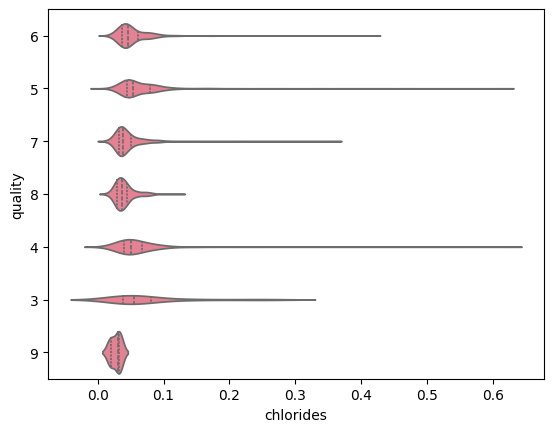

2023-11-16 14:26:09,946 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-16 14:26:09,951 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


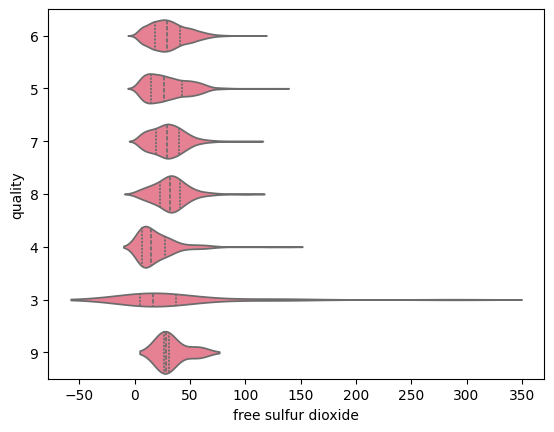

2023-11-16 14:26:10,236 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-16 14:26:10,242 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


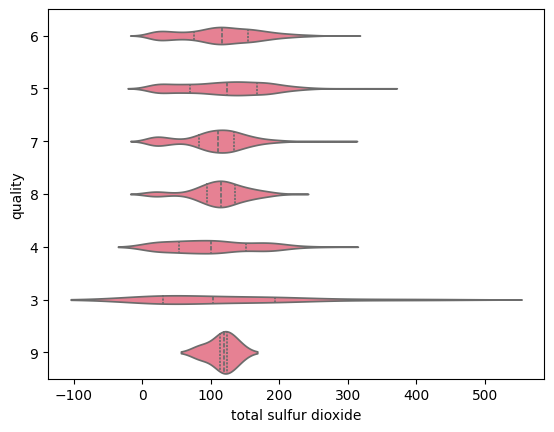

2023-11-16 14:26:10,477 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-16 14:26:10,491 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


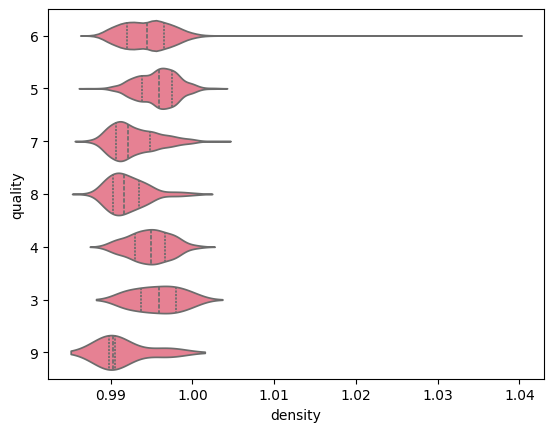

2023-11-16 14:26:10,758 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-16 14:26:10,769 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


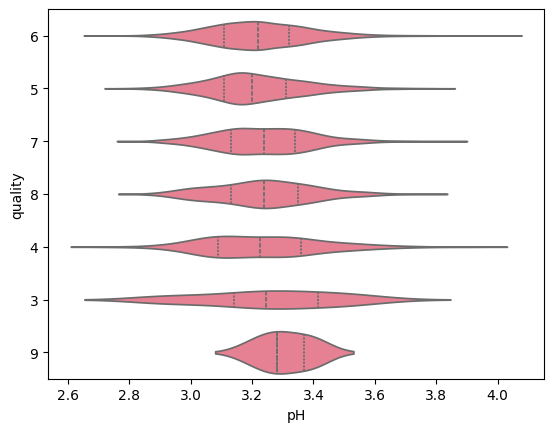

2023-11-16 14:26:11,062 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-16 14:26:11,072 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


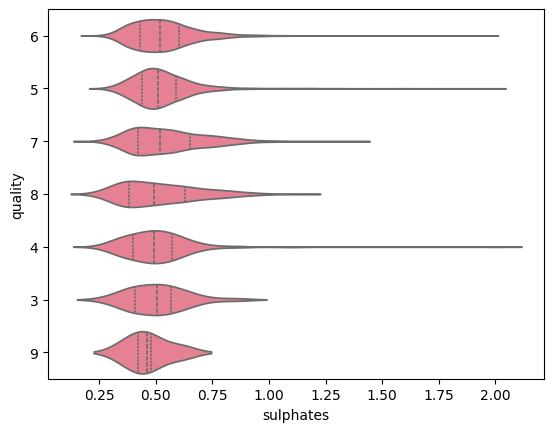

2023-11-16 14:26:11,460 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-16 14:26:11,465 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


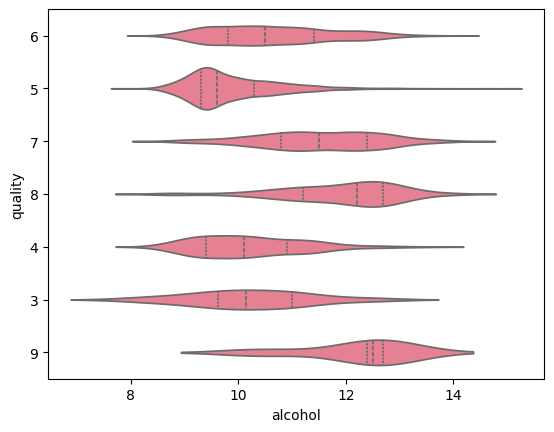

2023-11-16 14:26:11,732 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-16 14:26:11,741 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-16 14:26:11,749 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-16 14:26:11,757 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


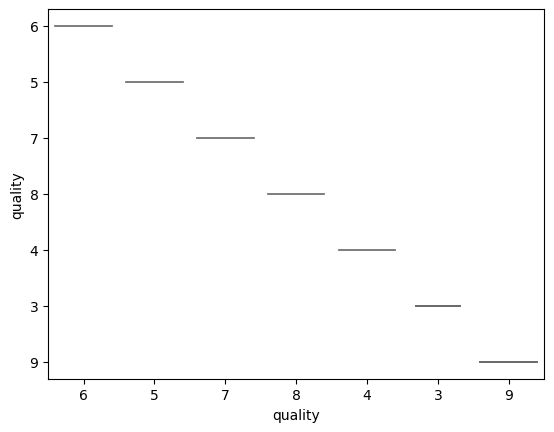

In [11]:
pl_wine_df = wine_df.copy()
pl_wine_df['quality'] = wine_df['quality'].astype(str)
for col_names,_ in pl_wine_df.items():
    g = sns.violinplot(y='quality', x=str(col_names), data=pl_wine_df, inner='quartile')
    plt.show()

### Insert our wine DataFrame into a FeatureGroup
Let's write our historical wine feature values and labels to a feature group.
When you write historical data, this process is called `backfilling`.

In [12]:
new_col_names = {}
for col_name,_ in wine_df.items():
    old_col_name = str(col_name)
    new_col_names[old_col_name] = old_col_name.replace(" ", "_")
wine_df.rename(new_col_names, axis='columns', inplace=True)
wine_df


,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,white,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
wine_fg = fs.get_or_create_feature_group(
    name="wine_quality",
    version=2,
    primary_key=['type','fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality'], 
    description="wine quality dataset")
wine_fg.insert(wine_df)

2023-11-16 14:26:51,120 INFO: 	0 expectation(s) included in expectation_suite.


Validation succeeded.
Validation Report saved successfully, explore a summary at https://c.app.hopsworks.ai:443/p/185498/fs/185417/fg/227687


Uploading Dataframe: 100.00% |█| Rows 5295/5295 | Elapsed Time: 00:06 | Remainin


Launching job: wine_quality_2_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/185498/jobs/named/wine_quality_2_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x298e19ca0>,
 {
   "evaluation_parameters": {},
   "results": [],
   "meta": {
     "great_expectations_version": "0.14.13",
     "expectation_suite_name": " ",
     "run_id": {
       "run_time": "2023-11-16T13:26:51.120134+00:00",
       "run_name": null
     },
     "batch_kwargs": {
       "ge_batch_id": "cd12529e-8483-11ee-9a92-6aea365fe920"
     },
     "batch_markers": {},
     "batch_parameters": {},
     "validation_time": "20231116T132651.119868Z",
     "expectation_suite_meta": {
       "great_expectations_version": "0.14.13"
     }
   },
   "statistics": {
     "evaluated_expectations": 0,
     "successful_expectations": 0,
     "unsuccessful_expectations": 0,
     "success_percent": null
   },
   "success": true
 })